In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [7]:
# load dataset:
data = pd.read_csv(r'E:\ExcelR ass\Decision_tree_ass\Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
# reanme columns names  :
data.columns = ["Undergrad", "Marital_status", "tax_income", "population", "work_exp", "Urban"]
data.head()
data["tax_income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: tax_income, dtype: float64

In [12]:
df = pd.get_dummies(data)
df["tax_nature"] = pd.cut(data["tax_income"], bins=[10000,30000,99619], labels=["Risky","Good"])
df.head()
# df.shape     #(600, 11)

,tax_income,population,work_exp,Undergrad_NO,Undergrad_YES,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,Urban_NO,Urban_YES,tax_nature
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [15]:
x = df.iloc[:,0:10]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [16]:
import numpy as np
# C5.0:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
pred = model.predict(x_test)
np.mean(pred == y_test)            # 98.33 %

0.9833333333333333

In [20]:
# pred
pd.crosstab(y_test, pred)

col_0,Good,Risky
tax_nature,,
Risky,2,28
Good,90,0


In [17]:
# CART :
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
np.mean(y_pred == y_test)         # 98.33 %

0.9833333333333333

[Text(167.4, 163.07999999999998, 'X[0] <= 29887.0\ngini = 0.315\nsamples = 480\nvalue = [386, 94]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 386\nvalue = [386, 0]')]

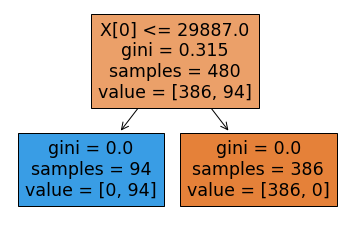

In [18]:
# visulization :
import matplotlib.pyplot as plt
%matplotlib inline
tree.plot_tree(model, filled=True)

In [21]:
# univariate feture selection, REF :
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
# test = SelectKBest(score_func = chi2,k=4)
# fit = test.fit(x,y)
model = LogisticRegression(max_iter=400)
rfe = RFE(model,3)
fit = rfe.fit(x,y)

C:\Users\mites\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [22]:
fit.ranking_

array([7, 8, 6, 1, 3, 1, 1, 2, 4, 5])

In [23]:
x.columns

Index(['tax_income', 'population', 'work_exp', 'Undergrad_NO', 'Undergrad_YES',
       'Marital_status_Divorced', 'Marital_status_Married',
       'Marital_status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [ ]:
# Division base on Undergraduation and Marital gives us good model for prediction nature of taxation.

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [25]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy                   # 98.33 %      

C:\Users\mites\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9833333333333333

In [ ]:
# here by using xgboost we got same accuracy which means a simple decision tree is enough for this problem.